In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#Read the grin trucking cost index csv file
grain_trucking_cost_df = pd.read_csv("staging/grain_trucking_cost.csv")
grain_trucking_cost_df.head()

,Year,Month,Trucking Cost Index
0,2018,1,202.00
1,2018,2,204.50
2,2018,3,200.50
3,2018,4,207.60
4,2018,5,217.75


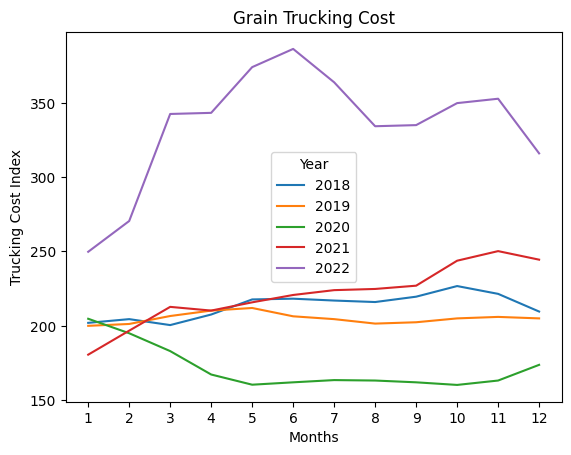

In [10]:
#Plot the grain trucking cost index
grain_trucking_cost_graph = grain_trucking_cost_df.pivot(index='Month', columns='Year', values='Trucking Cost Index')
grain_trucking_cost_graph.plot()
plt.xlabel("Months")
plt.ylabel("Trucking Cost Index")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Grain Trucking Cost")
plt.savefig("output/trucking_cost_index.png")

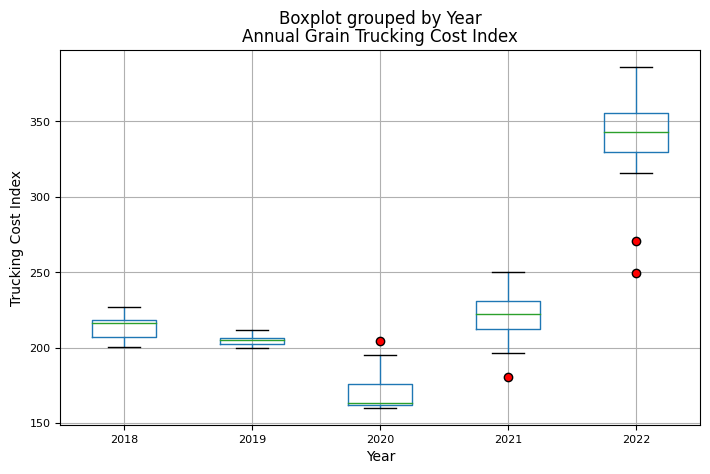

In [5]:
grain_trucking_cost_df.boxplot("Trucking Cost Index", by="Year", figsize=(8,5), fontsize=8, flierprops=dict(marker='o', markerfacecolor='red'))
plt.title("Annual Grain Trucking Cost Index")
plt.xlabel("Year")
plt.ylabel("Trucking Cost Index")
plt.savefig("output/trucking_cost_box_plot")
plt.show()

In [6]:
trucking_cost_index_2018 = grain_trucking_cost_df.loc[grain_trucking_cost_df['Year'] == 2018, "Trucking Cost Index"]
trucking_cost_index_2019 = grain_trucking_cost_df.loc[grain_trucking_cost_df['Year'] == 2019, "Trucking Cost Index"]
trucking_cost_index_2020 = grain_trucking_cost_df.loc[grain_trucking_cost_df['Year'] == 2020, "Trucking Cost Index"]
trucking_cost_index_2021 = grain_trucking_cost_df.loc[grain_trucking_cost_df['Year'] == 2021, "Trucking Cost Index"]
trucking_cost_index_2022 = grain_trucking_cost_df.loc[grain_trucking_cost_df['Year'] == 2022, "Trucking Cost Index"]

In [9]:
# Perform the ANOVA
stats.f_oneway(trucking_cost_index_2018,trucking_cost_index_2019,trucking_cost_index_2020,trucking_cost_index_2021,trucking_cost_index_2022)

F_onewayResult(statistic=100.76720549222793, pvalue=1.2182782883287015e-24)

In [7]:
#Read the refrigerated trucking volume per commodity
refrigerated_food_volume_df = pd.read_csv("staging/refrigerated_truck_volume.csv")
refrigerated_food_volume_df.head()

,date,Weekday,Month,Year,Quarter,Tuesday Week Ending,Tuesday Week Ending Number,Season,Mode,Region,Origin,District,Commodity,"10,000 LBS"
0,01/01/2018,1,1,2018,1,01/02/2018,52,2017,Truck,California,California-south,Oxnard District,Strawberries,18
1,01/01/2018,1,1,2018,1,01/02/2018,52,2017,Truck,Florida,Florida,Florida Districts,Beans,8
2,01/01/2018,1,1,2018,1,01/02/2018,52,2017,Truck,Florida,Florida,Florida Districts,Broccoli,42
3,01/01/2018,1,1,2018,1,01/02/2018,52,2017,Truck,Florida,Florida,Florida Districts,Cabbage,104
4,01/01/2018,1,1,2018,1,01/02/2018,52,2017,Truck,Florida,Florida,Florida Districts,Celery,82


In [8]:
#Aggregate the volumes for year and month
refrigerated_food_volume_totals = refrigerated_food_volume_df.groupby(['Year','Month']).sum()['10,000 LBS'].rename('Total food volume (0000 lbs)').reset_index()
refrigerated_food_volume_totals.head()

,Year,Month,Total food volume (0000 lbs)
0,2018,1,616026
1,2018,2,580717
2,2018,3,689073
3,2018,4,643988
4,2018,5,745685


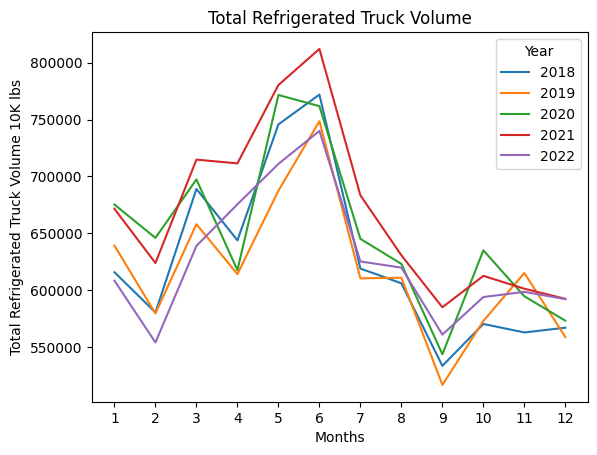

In [9]:
refrigerated_food_vol_graph = refrigerated_food_volume_totals.pivot(index='Month', columns='Year', values='Total food volume (0000 lbs)')
refrigerated_food_vol_graph.plot()
plt.xlabel("Months")
plt.ylabel("Total Refrigerated Truck Volume 10K lbs")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Total Refrigerated Truck Volume")
plt.savefig("output/total_refrigerated_truck_vol.png")